# Integrantes
- Aguilar Martínez Erick Yair
- Martínez Muñoz Alan Magno
- Mendoza Hernández Carlos Emiliano

In [2]:
import pandas as pd

cpi_data = pd.read_csv("CPIAUCSL.csv", parse_dates=['DATE'], index_col='DATE')
cpi_data = cpi_data.rename(columns={'CPIAUCSL': 'CPI'})


In [3]:
# Moving Average
cpi_data['MA_12'] = cpi_data['CPI'].rolling(window=12).mean()


In [4]:
# Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(cpi_data['CPI']).fit(smoothing_level=0.2)
cpi_data['SES'] = model.fittedvalues


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [5]:
# Holt-Winters

from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(cpi_data['CPI'], seasonal='add', seasonal_periods=12).fit()
cpi_data['Holt_Winters'] = hw_model.fittedvalues


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
# Regresión Lineal

from sklearn.linear_model import LinearRegression
import numpy as np

cpi_data['time'] = np.arange(len(cpi_data))
X = cpi_data[['time']]
y = cpi_data['CPI']

lin_reg = LinearRegression().fit(X, y)
cpi_data['Linear_Regression'] = lin_reg.predict(X)


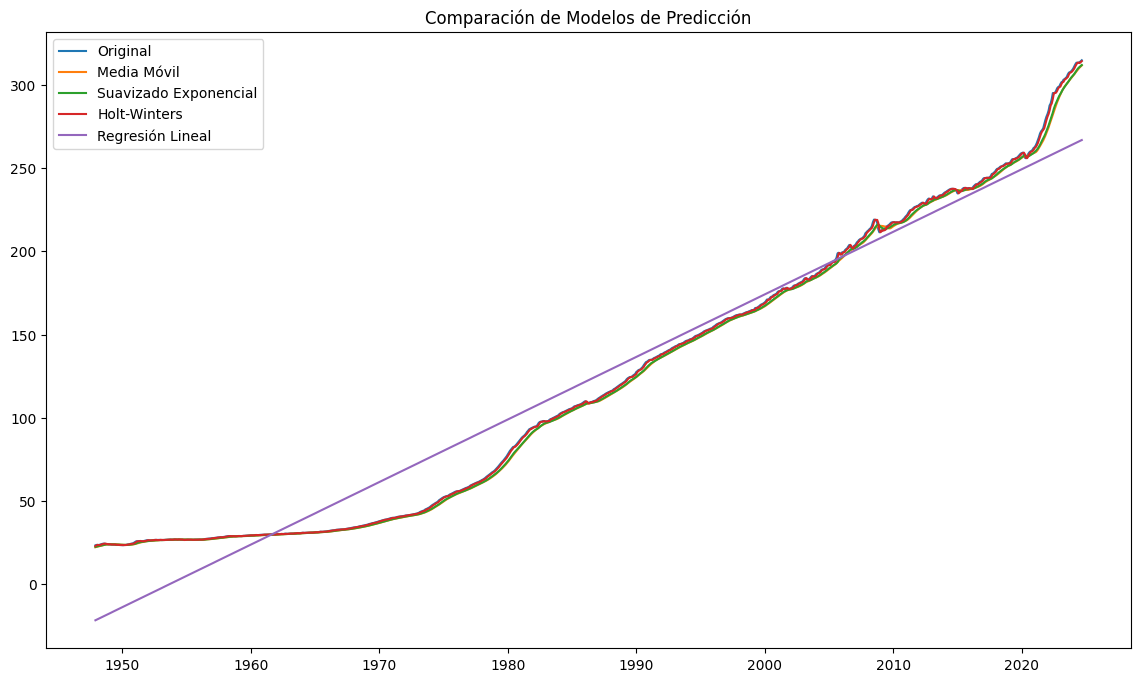

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(cpi_data['CPI'], label="Original")
plt.plot(cpi_data['MA_12'], label="Media Móvil")
plt.plot(cpi_data['SES'], label="Suavizado Exponencial")
plt.plot(cpi_data['Holt_Winters'], label="Holt-Winters")
plt.plot(cpi_data['Linear_Regression'], label="Regresión Lineal")
plt.legend(loc="best")
plt.title("Comparación de Modelos de Predicción")
plt.show()


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

cpi_data = cpi_data.dropna()

y_true = cpi_data['CPI']

y_pred_ma = cpi_data['MA_12']
y_pred_ses = cpi_data['SES']
y_pred_hw = cpi_data['Holt_Winters']
y_pred_lr = cpi_data['Linear_Regression']

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mae, mse

mae_ma, mse_ma = calculate_metrics(y_true, y_pred_ma)
mae_ses, mse_ses = calculate_metrics(y_true, y_pred_ses)
mae_hw, mse_hw = calculate_metrics(y_true, y_pred_hw)
mae_lr, mse_lr = calculate_metrics(y_true, y_pred_lr)

print("Media Móvil (12 meses):       MAE =", mae_ma,",  MSE =", mse_ma)
print("Suavizado Exponencial Simple: MAE =", mae_ses,",  MSE =", mse_ses)
print("Holt-Winters:                 MAE =", mae_hw, ", MSE =", mse_hw)
print("Regresión Lineal:             MAE =", mae_lr, ",  MSE =", mse_lr)


Media Móvil (12 meses):       MAE = 1.7979947577729571 ,  MSE = 5.997001713138707
Suavizado Exponencial Simple: MAE = 1.6229724774019672 ,  MSE = 4.841571280675477
Holt-Winters:                 MAE = 0.38128960251588156 , MSE = 0.32326973747979393
Regresión Lineal:             MAE = 14.622291958480645 ,  MSE = 347.5846966252805


El modelo Holt-Winters demostró ser el más preciso, con los menores valores de MAE y MSE, debido a su capacidad para capturar tanto tendencia como estacionalidad. El suavizado exponencial simple y la media móvil también mostraron un rendimiento aceptable, aunque no tan eficaz, ya que carecen de la capacidad de adaptarse a patrones estacionales. La regresión lineal, por otro lado, presentó el mayor error, ya que es incapaz de capturar la naturaleza estacional y las fluctuaciones.